In [1]:
# Let's try to build a classifier to detect the Iris Virginica flower fom other Iris flowers based on petal width.
# Load the Iris dataset
from sklearn import datasets

iris = datasets.load_iris()

# Display available keys in the dataset
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
# Extract petal width as the feature
X = iris["data"][:, 3:]  

# Create the target variable: 1 if Iris Virginica, 0 otherwise
y = (iris["target"] == 2).astype(int)  

In [3]:
# Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

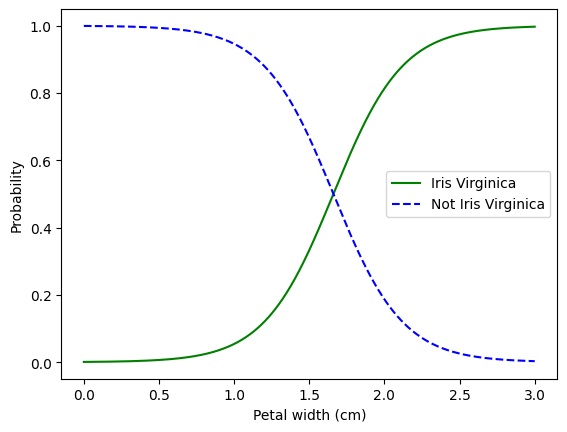

In [4]:
# Generate new petal width values ranging from 0 cm to 3 cm
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)

# Compute predicted probabilities for each value in X_new
y_proba = log_reg.predict_proba(X_new)

# Plot probability of being Iris Virginica (positive class)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")

# Plot probability of not being Iris Virginica (negative class)
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")

# Add label, legend and display plot
plt.xlabel('Petal width (cm)')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [5]:
# The model's decision threshold is around 1.6 cm
# So if we ask for the probability of Iris Virginica with a pedal of 1.5 cm, it will predict 0 (not iris virginica)
# If we ask for the probability of Iris Virginica with a pedal of 1.7 cm, it will predict 1 (it is iris virginica)
# Predict class labels for petal widths of 1.7 cm and 1.5 cm
log_reg.predict([[1.7],[1.5]])

array([1, 0])